In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import label

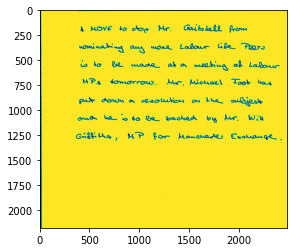

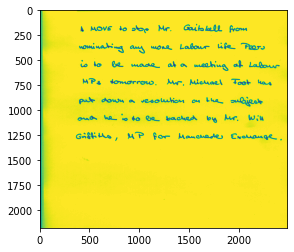

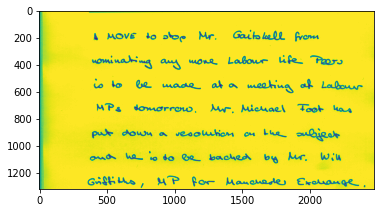

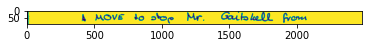

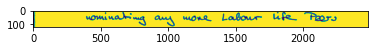

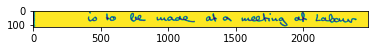

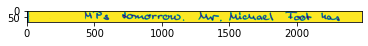

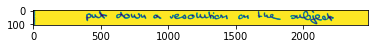

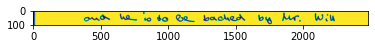

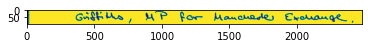

In [9]:

def crop_handwritten_region(imgpath):
    
    img = cv2.imread(imgpath)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret3,bin_img = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    width_threshold = 1000
    height_threshold = 500

    width_array =[]
    y_array =[]
    # Detect the main horizontal black separator lines of the IAM handwriting forms.
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        
        if w > width_threshold:
            if h <height_threshold:
                width_array.append (w) 
                y_array.append(y)
                
                
    indixes = sorted(range(len(width_array)), key=lambda k: width_array[k])
    indixes.reverse()
    three_lines_y=[]
    three_lines_y.append(y_array[0])
    three_lines_y.append(y_array[1])
    three_lines_y.append(y_array[2])
    three_lines_y.sort()

    newCooriate_y1= three_lines_y[1]
    newCooriate_y2= three_lines_y[2]

    cropped_imagebin = bin_img[newCooriate_y1+4:newCooriate_y2 , :]
    cropped_imagegray = imgray[newCooriate_y1+4:newCooriate_y2 , :]
    
    # array contains summation of black pixels on each row of the image
    sum_black_in_row = np.sum(cropped_imagebin < 255, axis=1)
    # threshold for rows contains black pixel > 15 
    intial_lines = sum_black_in_row > 15
    i = 0
    upp=0
    downn=0
    while i < len(intial_lines):
        if intial_lines[i] == True:
            begin_row = i
            if begin_row - 6 < 0:
                up = 0
            else:
                up = begin_row - 6
                if i==0:
                    upp=up
            while i < len(intial_lines) and intial_lines[i]:
                i += 1
            if i+5 > len(intial_lines) - 1 :
                down=len(intial_lines) - 1
            else:
                 down = i + 6
            if i - begin_row > 20:  # threshold for # of rows to be higher than 20 row 
                downn =down
        i += 1
        
    cropped_image_more = cropped_imagegray[upp:downn+4 , :]
    return cropped_imagebin, cropped_imagegray,cropped_image_more

def split_lines(img):
    
    # array contains summation of black pixels on each row of the image
    sum_black_in_row = np.sum(img < 255, axis=1)
    # threshold for rows contains black pixel > 15 
    intial_lines = sum_black_in_row > 15
    lines = []
    i = 0

    while i < len(intial_lines):
        if intial_lines[i] == True:
            begin_row = i
            if begin_row - 6 < 0:
                up = 0
            else:
                up = begin_row - 6
            while i < len(intial_lines) and intial_lines[i]:
                i += 1
            if i+5 > len(intial_lines) - 1 :
                down=len(intial_lines) - 1
            else:
                 down = i + 6
            if i - begin_row > 20:  # threshold for # of rows to be higher than 20 row 
                lines.append(img[up:down, :])
        i += 1
    return lines

if __name__ == '__main__':
    imgpath ='a01-000u.png'
    cropped_imgbin,cropped_imggray,cropped_img_more = crop_handwritten_region(imgpath)
    imgplot = plt.imshow(cropped_imgbin)
    plt.show()
    imgplot = plt.imshow(cropped_imggray)
    plt.show()
    imgplot = plt.imshow(cropped_img_more)
    plt.show()
    for i in split_lines(cropped_imgbin):
        imgplot = plt.imshow(i)
        plt.show()